<a href="https://colab.research.google.com/github/akrawat912/Deep-Learning/blob/master/bbcNews%20Topic%20Modeling%20with%20LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
from google.colab import files
files.upload()

In [0]:
data=pd.read_csv('BBC train.csv')
documents=data[['Text']]

In [0]:
documents['index']=documents.index

In [0]:
documents[:3]

,Text,index
0,worldcom ex-boss launches defence lawyers defe...,0
1,german business confidence slides german busin...,1
2,bbc poll indicates economic gloom citizens in ...,2


In [0]:
import nltk
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from gensim.corpora import Dictionary
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)

In [0]:
stemmer = SnowballStemmer('english')

In [0]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [0]:
# example, verb POS of word 'paased' is pass
WordNetLemmatizer().lemmatize('passed', pos='v')

'pass'

### Preprocessing

In [0]:
stemmer.stem('globalization')

'global'

In [0]:
def lemmatize_stemize(text):
    '''reutrns stemized  after lemmatized of word'''
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

def preprocess(text):
    '''returns tokenized text after removing stopwords and non stopwords length of less than 3 will be discarded'''
    result=[]
    for token in simple_preprocess(text):
        if token not in STOPWORDS and len(token)>3:
            result.append(lemmatize_stemize(token))
    return result

In [0]:
# example 
eg='''worldcom ex-boss launches defence lawyers defending former worldcom chief 
bernie ebbers against a battery of fraud charges have called a company whistleblower as their first witness'''
preprocess(eg)

['worldcom',
 'boss',
 'launch',
 'defenc',
 'lawyer',
 'defend',
 'worldcom',
 'chief',
 'berni',
 'ebber',
 'batteri',
 'fraud',
 'charg',
 'call',
 'compani',
 'whistleblow',
 'wit']

In [0]:
processed_docs = documents['Text'].map(preprocess)

In [0]:
processed_docs[:5]

0    [worldcom, boss, launch, defenc, lawyer, defen...
1    [german, busi, confid, slide, german, busi, co...
2    [poll, indic, econom, gloom, citizen, major, n...
3    [lifestyl, govern, mobil, choic, faster, bette...
4    [enron, boss, payout, eighteen, enron, directo...
Name: Text, dtype: object

In [0]:
dic=Dictionary(processed_docs)

In [0]:
count=0
for key, value in dic.iteritems():
    print(key, value)
    count+=1
    if count > 10: break

0 account
1 adjust
2 agre
3 alert
4 andersen
5 answer
6 approv
7 argu
8 arthur
9 audit
10 auditor


### Bag of Words on preprocessed documents

In [0]:
#dic.filter_extremes()
bow=[dic.doc2bow(doc) for doc in processed_docs]
bow[0][:10]
# word with token_id 0 appears 7 times in document

[(0, 7),
 (1, 1),
 (2, 1),
 (3, 2),
 (4, 2),
 (5, 1),
 (6, 1),
 (7, 2),
 (8, 1),
 (9, 1)]

### TF-IDF

In [0]:
from gensim import models
tfidf = models.TfidfModel(bow)

In [0]:
corpus_tfidf = tfidf[bow]

In [0]:
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.2181282188871793),
 (1, 0.05730145584508868),
 (2, 0.03244070754097687),
 (3, 0.10811260430807983),
 (4, 0.16485691060183388),
 (5, 0.04662678411441539),
 (6, 0.04251467917863171),
 (7, 0.0709146229783829),
 (8, 0.06452761970766617),
 (9, 0.059291960930853045),
 (10, 0.12329245751590523),
 (11, 0.04662678411441539),
 (12, 0.05269581096132723),
 (13, 0.06824237872747843),
 (14, 0.03479497536807644),
 (15, 0.03416496147502478),
 (16, 0.05034154313422765),
 (17, 0.024323657814450183),
 (18, 0.07347803750429155),
 (19, 0.02221075633011451),
 (20, 0.08617784556349384),
 (21, 0.07297097344335055),
 (22, 0.051465096975257106),
 (23, 0.039870225580601396),
 (24, 0.043745393164701836),
 (25, 0.035801671186501564),
 (26, 0.061646228757952615),
 (27, 0.041391125337602266),
 (28, 0.05405630215403991),
 (29, 0.21622520861615965),
 (30, 0.08242845530091694),
 (31, 0.02418097433649921),
 (32, 0.041391125337602266),
 (33, 0.03068287043229277),
 (34, 0.025369188920400826),
 (35, 0.06824237872747

### Running LDA using Bag of Words

In [0]:
lda_model=gensim.models.LdaModel(corpus=bow, num_topics=5, id2word=dic, passes=10, iterations=100)

In [0]:
for idx, topic in lda_model.print_topics(-1, 15):
    print('Topic {} : Words : {}'.format(idx, topic))

Topic 0 : Words : 0.020*"say" + 0.009*"year" + 0.009*"game" + 0.005*"peopl" + 0.005*"time" + 0.004*"world" + 0.004*"firm" + 0.004*"play" + 0.003*"like" + 0.003*"come" + 0.003*"month" + 0.003*"compani" + 0.003*"open" + 0.003*"roddick" + 0.003*"take"
Topic 1 : Words : 0.018*"say" + 0.006*"peopl" + 0.005*"time" + 0.004*"wale" + 0.004*"work" + 0.004*"year" + 0.004*"think" + 0.004*"govern" + 0.003*"like" + 0.003*"plan" + 0.003*"gadget" + 0.003*"phone" + 0.003*"parti" + 0.003*"come" + 0.003*"go"
Topic 2 : Words : 0.014*"say" + 0.012*"year" + 0.012*"film" + 0.009*"best" + 0.009*"award" + 0.005*"rise" + 0.005*"take" + 0.004*"star" + 0.004*"month" + 0.004*"price" + 0.003*"oscar" + 0.003*"growth" + 0.003*"time" + 0.003*"rat" + 0.003*"includ"
Topic 3 : Words : 0.019*"say" + 0.006*"elect" + 0.006*"blair" + 0.006*"year" + 0.006*"labour" + 0.005*"play" + 0.004*"minist" + 0.004*"govern" + 0.004*"tell" + 0.004*"england" + 0.004*"time" + 0.004*"parti" + 0.004*"club" + 0.004*"game" + 0.004*"go"
Topic 4 

In [0]:
lda_model[bow[0]]
# has topic 4

[(4, 0.994782)]

### Visualization

In [0]:
!pip install pyLDAvis

     |████████████████████████████████| 1.6MB 2.8MB/s 
     |████████████████████████████████| 552kB 11.0MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97711 sha256=9198f30558a82d2dfc8bfcdeeb724e9b90f9c394b6fc5d46c43949bb209b146d
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
  Created wheel for funcy: filename=funcy-1.14-py2.py3-none-any.whl size=32042 sha256=5f0371fc8bfc49f1f6829e5f35732b5f3482bb9abf9d8dbfcda91905b32afe3f
  Stored in directory: /root/.cache/pip/wheels/20/5a/d8/1d875df03deae6f178dfdf70238cca33f948ef8a6f5209f2eb
Successfully built pyLDAvis funcy


In [0]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()

In [0]:
pyLDAvis.gensim.prepare(lda_model, bow, dic)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.096710  0.059066       1        1  24.286068
0      0.028179  0.021229       2        1  22.827974
3     -0.116170 -0.002697       3        1  22.285736
1     -0.041347  0.055315       4        1  16.870049
2      0.032628 -0.132912       5        1  13.730174, topic_info=         Term        Freq       Total Category  logprob  loglift
373      film  252.000000  252.000000  Default  30.0000  30.0000
687     award  139.000000  139.000000  Default  29.0000  29.0000
1055     best  248.000000  248.000000  Default  28.0000  28.0000
868     blair  176.000000  176.000000  Default  27.0000  27.0000
158    labour  179.000000  179.000000  Default  26.0000  26.0000
...       ...         ...         ...      ...      ...      ...
767   increas   35.164349  154.817978   Topic5  -6.0223   0.5034
431      show   34.606552  143.097015   Topic5  -6.0383   0.5661
143        go   35.875885  267.414246   Topic5  -6.0023  -0.0232
578      play   36.368008  305.203064   Topic5  -5.9887  -0.1417
291     place   32.342865  152.169678   Topic5  -6.1060   0.4370

[426 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
5439      1  0.037585  academi
5439      4  0.037585  academi
5439      5  0.902046  academi
4685      1  0.081172    actor
4685      2  0.064937    actor
...     ...       ...      ...
1692      4  0.018976     yuko
2251      1  0.023643  zealand
2251      2  0.023643  zealand
2251      3  0.118217  zealand
2251      4  0.803872  zealand

[980 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 1, 4, 2, 3])

In [0]:
## wordcloud of each topic for top N keywords
from wordcloud import WordCloud, STOPWORDS
cloud=WordCloud(stopwords=STOPWORDS,
                  background_color='black',
                  width=2500,
                  height=1800,
                  max_words=10,
                 prefer_horizontal=1.0)

In [0]:
topics=lda_model.show_topics(formatted=False, num_words=15)

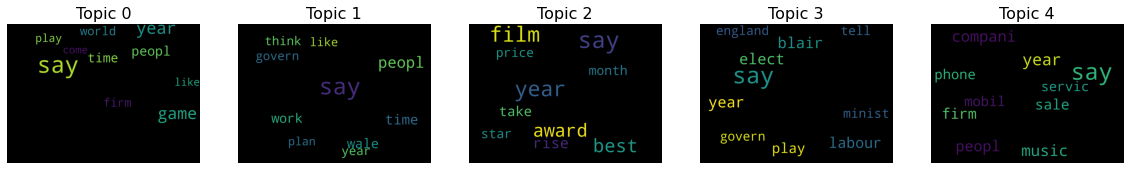

In [0]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,5,figsize=(20,30), sharex=True, sharey=True)
for i, ax in enumerate(ax.flatten()):
  fig.add_subplot(ax)
  topic_words=dict(topics[i][1])
  cloud.generate_from_frequencies(topic_words, max_font_size=300)
  plt.gca().imshow(cloud)
  plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
  plt.gca().axis('off')

In [0]:
## Topic 0 contains most frequent words like: play, game, world, looks SPORTS category
## Topic 1 contains: govern, plan, work, year, think looks BUSINESS category
## Topic 2 contains: film, award, start, best looks FILM/ENTERTAINMENT category
## Topic 3 contains: govern, plan, elect, minist(ministery) looks POLITICS category
## Topic 4 contains: compni, phone, firm, music, mobil, service, sale looks TECHNOLOGY category

In [0]:
# Testing on unseen document
test_doc='''software watching while you work software that can not only monitor every keystroke and action performed at a pc but also be used as legally binding evidence of wrong-doing has been unveiled. 
 worries about cyber-crime and sabotage have prompted many employers to consider monitoring employees. the developers behind the system claim it is a break-through in the way data is monitored and stored. 
 but privacy advocates are concerned by the invasive nature of such software.  
 the system is a joint venture between security firm 3ami and storage specialists bridgehead software. 
 they have joined forces to create a system which can monitor computer activity  store it and retrieve disputed files within minutes.
  more and more firms are finding themselves in deep water as a result of data misuse. sabotage and data theft are most commonly committed from within an organisation according to the national hi-tech crime unit (nhtcu) a survey conducted on its behalf by nop found evidence that more than 80% of medium and large companies have been victims of some form of cyber-crime. bridgehead software has come up with techniques to prove  to a legal standard  that any stored file on a pc has not been tampered with. ironically the impetus for developing the system came as a result of the freedom of information act  which requires companies to store all data for a certain amount of time. 
   the storage system has been incorporated into an application developed by security firm 3ami which allows every action on a computer to be logged. potentially it could help employers to follow the trail of stolen files and pinpoint whether they had been emailed to a third party  copied  printed  deleted or saved to cd  floppy disk  memory stick or flash card. other activities the system can monitor include the downloading of pornography  the use of racist or bullying language or the copying of applications for personal use. increasingly organisations that handle sensitive data  such as governments  are using biometric log-ins such as fingerprinting to provide conclusive proof of who was using a particular machine at any given time. privacy advocates are concerned that monitoring at work is not only damaging to employee s privacy but also to the relationship between employers and their staff.  that is not the case   said tim ellsmore  managing director of 3ami.  it is not about replacing dialogue but there are issues that you can talk through but you still need proof   he said.  
people need to recognise that you are using a pc as a representative of a company and that employers have a legal requirement to store data   he added.'''

# looks TECHNOLOGY news

In [0]:
test_bow=dic.doc2bow(preprocess(test_doc))

In [0]:
lda_model[test_bow]
# Wowwwwwwww! has topic 4 (70%) as we stated above topic 4 might be TECHNOLOGY

[(0, 0.19920246), (1, 0.096446335), (2, 0.012433796), (4, 0.69088244)]

In [0]:
test_doc2='''career honour for actor dicaprio actor leonardo dicaprio s  exceptional career  has been honoured at 
the santa barbara international film festival.  the star was presented with the award by martin scorsese  
who directed him in oscar-nominated movie the aviator.  it s a lifetime achievement award  which is completely and 
utterly surreal  given i m only 30 years old   dicaprio said.  but what has it been  almost 17 years now. 
i ve done quite a few films.  a retrospective of his movies was shown.   
what s really exciting  for me  is that this is what i really love doing he added.'''
# looks ENTERTAINMENT news

In [0]:
test_bow2 = dic.doc2bow(preprocess(test_doc2))
lda_model[test_bow2]
## This is really amazing right????
## Topic 2 is really ENTERTAINMENT and this news also 84% fall in that

[(1, 0.14492689), (2, 0.84138083)]